# Transfer learning with TensorFlow: Feature Extraction

## 1. Import and Get Familiar with the Data

In [1]:
import zipfile

!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close

--2023-12-04 20:35:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  22.9MB/s    in 8.1s    

2023-12-04 20:35:08 (19.8 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



<bound method ZipFile.close of <zipfile.ZipFile filename='10_food_classes_10_percent.zip' mode='r'>>

In [2]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_10_percent
There are 10 directories and 0 images in 10_food_classes_10_percent/test
There are 0 directories and 250 images in 10_food_classes_10_percent/test/steak
There are 0 directories and 250 images in 10_food_classes_10_percent/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_10_percent/test/hamburger
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_10_percent/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_10_percent/test/pizza
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ramen
There are 0 directories and 250 images in 10_food_classes_10_percent/test/sushi
There are 10 directori

In [3]:
# Create train and test dir variables
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [4]:
# Get class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [5]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

## 2. Preparing the data

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data loaders
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datgagen = ImageDataGenerator(rescale=1/255.)

# Create train and test data batches
print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

print("\nTesting images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.

Testing images:
Found 2500 images belonging to 10 classes.


## 3. Setting up callbacks

Callbacks are extra functionality to add to models to be performed during or after training.

Popular callbacks:
* Tracking experiments with the **TensorBoard** callback
* Model checkpoint with the **ModelCheckpoint** callback
* Stopping a model from training (before it trains too long and overfits) with **EarlyStopping** callback

In [7]:
# Setup a function to create a TensorBoard callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


## 4. Creating models using TensorFlow Hub

In [8]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [9]:
tf.__version__

'2.15.0'

In [11]:
import tensorflow as tf
# Upgrade TF to 2.15 and check version
!pip install --upgrade tensorflow
tf.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 100.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successful

'2.14.0'

In [11]:
resnet_url = "https://www.kaggle.com/models/tensorflow/resnet-50/frameworks/TensorFlow2/variations/feature-vector/versions/1"
efficientnet_url = "https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b0-feature-vector/versions/2"

In [12]:
IMG_SHAPE = (224, 224)

In [13]:
# Setup create_model() function to create models from URL
def create_model(model_url, num_classes=10):
  """
  Takes a TF Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
    layer and Dense output layer with num_classes output neurons.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the already learned patterns
                                           name="feature_extraction_layer",
                                           input_shape=IMG_SHAPE+(3,))

  # Create model
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model

### Create and test ResNet model

In [14]:
resnet_model = create_model(resnet_url,
                            num_classes=train_data.num_classes)

In [15]:
# Compile model
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [16]:
# Fit the model
rn_history_0 = resnet_model.fit(train_data,
                                epochs=5,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=len(test_data),
                                callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                       experiment_name="resnet_50"
                                                                       )])

Saving TensorBoard log files to: tensorflow_hub/resnet_50/20231204-203545
Epoch 1/5
24/24 [==============================] - 408s 17s/step - loss: 1.9188 - accuracy: 0.3893 - val_loss: 1.1247 - val_accuracy: 0.6388
Epoch 2/5
24/24 [==============================] - 390s 17s/step - loss: 0.8427 - accuracy: 0.7440 - val_loss: 0.8027 - val_accuracy: 0.7436
Epoch 3/5
24/24 [==============================] - 411s 18s/step - loss: 0.5666 - accuracy: 0.8413 - val_loss: 0.6512 - val_accuracy: 0.7900
Epoch 4/5
24/24 [==============================] - 383s 16s/step - loss: 0.4310 - accuracy: 0.9027 - val_loss: 0.5874 - val_accuracy: 0.8200
Epoch 5/5
24/24 [==============================] - 410s 18s/step - loss: 0.3361 - accuracy: 0.9307 - val_loss: 0.5649 - val_accuracy: 0.8252


In [17]:
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.

  Args:
    history: TensorFlor history object.

  Returns:
    Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend();

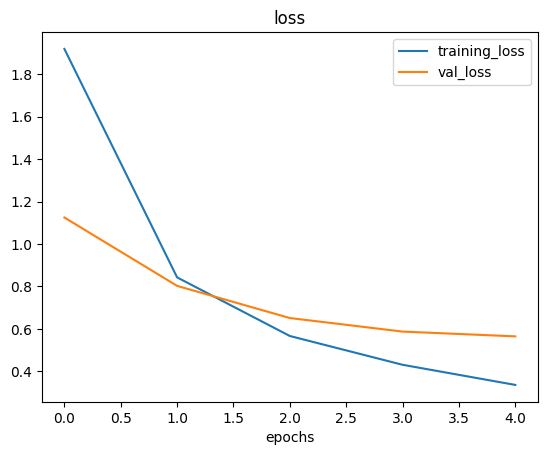

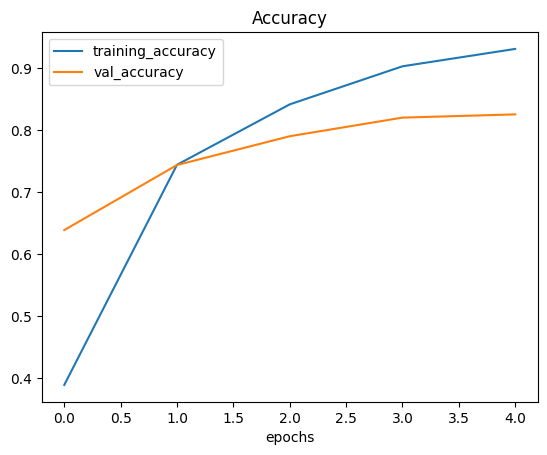

In [18]:
import matplotlib.pyplot as plt
plot_loss_curves(rn_history_0)

## Create and test EfficientNetB0 model

In [19]:
efnet_model_0 = create_model(efficientnet_url,
                             train_data.num_classes)

In [20]:
efnet_model_0.compile(loss="categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

In [21]:
efnet_history = efnet_model_0.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="efficientnetV2_b0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetV2_b0/20231204-211119
Epoch 1/5
24/24 [==============================] - 129s 5s/step - loss: 1.9617 - accuracy: 0.3613 - val_loss: 1.5078 - val_accuracy: 0.6084
Epoch 2/5
24/24 [==============================] - 119s 5s/step - loss: 1.2976 - accuracy: 0.6813 - val_loss: 1.1157 - val_accuracy: 0.7232
Epoch 3/5
24/24 [==============================] - 120s 5s/step - loss: 1.0001 - accuracy: 0.7693 - val_loss: 0.9450 - val_accuracy: 0.7452
Epoch 4/5
24/24 [==============================] - 118s 5s/step - loss: 0.8375 - accuracy: 0.7973 - val_loss: 0.8506 - val_accuracy: 0.7568
Epoch 5/5
24/24 [==============================] - 170s 7s/step - loss: 0.7273 - accuracy: 0.8307 - val_loss: 0.7904 - val_accuracy: 0.7712


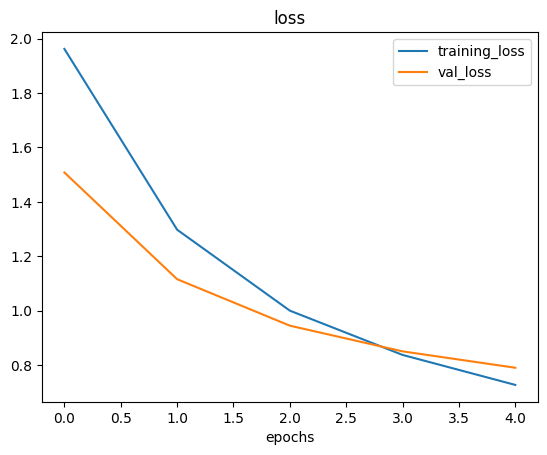

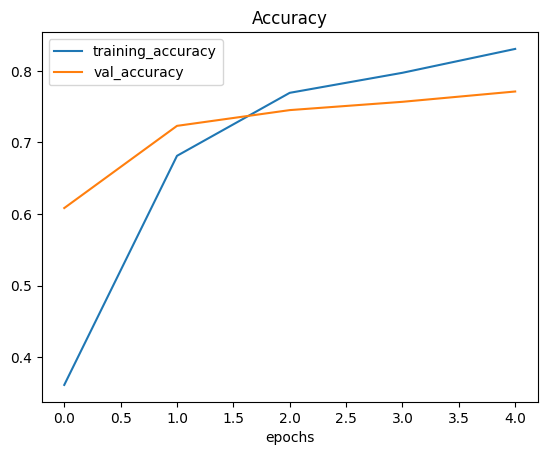

In [22]:
plot_loss_curves(efnet_history)

In [23]:
efnet_model_0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              5919312   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [24]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23561152  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23581642 (89.96 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23561152 (89.88 MB)
_________________________________________________________________


## 5. Different types of transfer learning

* "As is" transfer learning: Using an existing model with no changes at all (e.g. using ImageNet model on 100 ImageNet classes, none of your own).
* "Feature extraction" transfer learning: Use the prelearned patterns of an exsiting model (e.g. EfficientNetB0 trained on ImageNet) and adjust the output layer forr your own problem (e.g.1000 classes -> 10 classes of food).
* "Fine-tuning" transfer learning: Use the prelearned patterns of an existing model and "fine-tune" many or all of the underlying layers (including new output layers).